In [1]:
! pip install matplotlip

In [2]:
!pip install seaborn

In [171]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df=pd.read_csv('Video games.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [14]:
df1 = df[['Year','Global_Sales']].set_index("Year").stack().reset_index().rename(columns={"level_1":"Global_Sales",0:'value'})
df1

Year  Global_Sales  value
0      2006.0  Global_Sales  82.74
1      1985.0  Global_Sales  40.24
2      2008.0  Global_Sales  35.82
3      2009.0  Global_Sales  33.00
4      1996.0  Global_Sales  31.37
...       ...           ...    ...
16593  2002.0  Global_Sales   0.01
16594  2003.0  Global_Sales   0.01
16595  2008.0  Global_Sales   0.01
16596  2010.0  Global_Sales   0.01
16597  2003.0  Global_Sales   0.01

[16598 rows x 3 columns]

In [16]:
df1

Year  Global_Sales  value
0      2006.0  Global_Sales  82.74
1      1985.0  Global_Sales  40.24
2      2008.0  Global_Sales  35.82
3      2009.0  Global_Sales  33.00
4      1996.0  Global_Sales  31.37
...       ...           ...    ...
16593  2002.0  Global_Sales   0.01
16594  2003.0  Global_Sales   0.01
16595  2008.0  Global_Sales   0.01
16596  2010.0  Global_Sales   0.01
16597  2003.0  Global_Sales   0.01

[16598 rows x 3 columns]

In [24]:
fig = px.area(df1, x='Year', y='value',color='Global_Sales')

In [25]:
fig

In [28]:
fig = px.line(df, x='Global_Sales', y=['Year'], title='Stock Market Trends')
fig.show()

In [29]:
fig=px.histogram(df, x='Global_Sales' ,nbins=15)
fig

In [30]:
import plotly.graph_objs as go
import plotly.offline as pyo

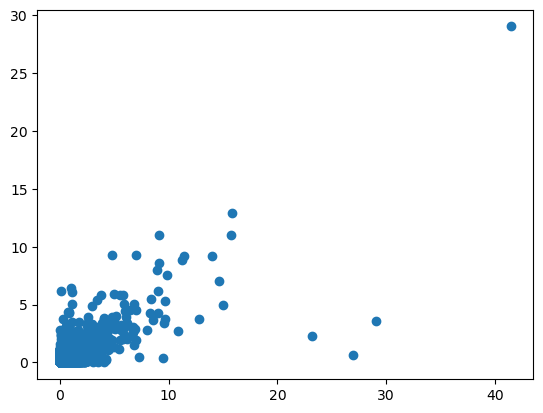

In [56]:
trace = plt.scatter(x=df['NA_Sales'], y=df['EU_Sales'])#, marker=dict(color=df['Platform']))

In [43]:
data=[trace]

In [57]:
layout = go.Layout(title='Relation between NA&EU',
                   xaxis=dict(title='NA'),
                   yaxis=dict(title='EU'))

In [59]:
fig = go.Figure(data=data,layout=layout)

In [60]:
fig

Text(0.5, 1.0, 'Relation between JP&other')

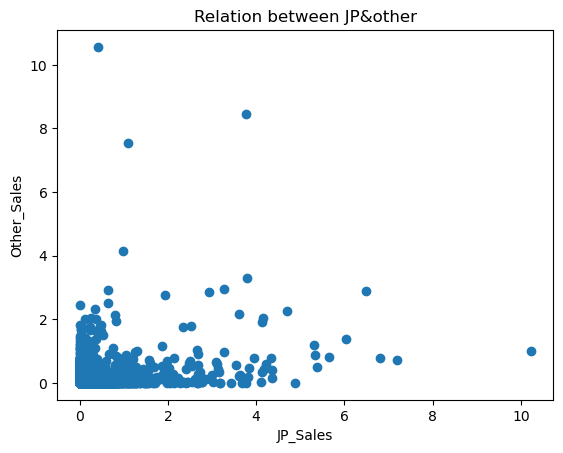

In [66]:
trace1 = plt.scatter(x=df['JP_Sales'], y=df['Other_Sales'])
plt.xlabel('JP_Sales')
plt.ylabel('Other_Sales')
plt.title('Relation between JP&other')



In [189]:
df = df.dropna()

In [219]:
df1 = df[['Platform','Year',"Global_Sales"]].sort_values(by ="Year").set_index("Year").stack().reset_index().rename(columns={"level_1":"Columns",0:'value'})
#df2=df1.groupby('Platform')
#pd.DataFrame(df2)
#stack_level_1 = df2.unstack(level=0)
df1=pd.DataFrame(df1).set_index('Year').reset_index().unstack(0)
df1

Year   0        1980.0
       1        1980.0
       2        1980.0
       3        1980.0
       4        1980.0
                 ...  
value  32577      0.01
       32578       PSV
       32579      0.01
       32580        DS
       32581      0.29
Length: 97746, dtype: object

In [209]:
fig1 = px.area(df1, x='Year', y='Platform',color=df1['value'])

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0] but received: Year

In [176]:
fig1

In [162]:
df1 = df.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values(by ="Global_Sales").iloc[-10:]
fig3 = px.bar(df1, x="Publisher", y="Global_Sales")
#df1


In [163]:
fig3

In [164]:
fig = px.pie(df, values='Global_Sales', names='Genre', title='the distribution of genres by global sales.')

In [165]:
fig